<a href="https://colab.research.google.com/github/IrinaIsobel/project2/blob/main/stroke_dataset_Project_2%2C_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwT4Q_Hiezgbu98UOI6Qb9BbkmnK8ghZ7-xowBNpr2_h2CHcE9JJNC4vzyAs4rxdRlIdmYCFBoldlj/pub?output=csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = stroke.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Target:
>Stroke
- Features:
>Age, Gender, Hypertension, Heart Disease, Work Type, Residence Type, Average Glucose Level, BMI, and Smoking Status

#Cleaning Data

- Changing column names to lowercase for convenience

In [5]:
df= df.rename(columns=str.lower)

- Removing Duplicates

In [6]:
df.duplicated().sum()

0

- Dropping Unecessary Columns

In [7]:
df.drop(columns = ['id', 'ever_married'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [8]:
df.shape

(5110, 10)

- Identifying and Addressing Missing Values

In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
201/5110

0.03933463796477495

> Of 5,110 rows, 201 have null values. This amounts to 3.9%, which is negligible, therefore I will drop the rows from the data set.



In [11]:
df.dropna(inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Identifying and Correcting Inconsistencies

In [12]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
dtypes = df.dtypes
cat_col = dtypes[dtypes == 'object'].index
cat_col

Index(['gender', 'work_type', 'residence_type', 'smoking_status'], dtype='object')

In [14]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n\n')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64



Urban    2490
Rural    2419
Name: residence_type, dtype: int64



never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64





In [15]:
df.replace({'children':'Children', 'Govt_job':'Govt_Job','Never_worked':'Never_Worked','never smoked':'Never_Smoked', 'formerly smoked':'Formerly_Smoked', 'smokes':'Smokes'}, inplace = True)

In [16]:
for col in cat_col:
    print(df[col].value_counts())
    print('\n\n')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



Private          2811
Self-employed     775
Children          671
Govt_Job          630
Never_Worked       22
Name: work_type, dtype: int64



Urban    2490
Rural    2419
Name: residence_type, dtype: int64



Never_Smoked       1852
Unknown            1483
Formerly_Smoked     837
Smokes              737
Name: smoking_status, dtype: int64





> All categorcial data is consistent.

In [17]:
num_col = dtypes[dtypes != 'object'].index
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [18]:
for col in num_col:
    print(f'Column = {col}')
    print(df[col].sort_values(ascending=False))
    print('\n\n')

Column = age
2314    82.00
670     82.00
4819    82.00
2341    82.00
3603    82.00
        ...  
3968     0.16
4021     0.16
3618     0.16
1614     0.08
3295     0.08
Name: age, Length: 4909, dtype: float64



Column = hypertension
759     1
3677    1
3578    1
1775    1
1776    1
       ..
1838    0
1835    0
1834    0
1833    0
5109    0
Name: hypertension, Length: 4909, dtype: int64



Column = heart_disease
0       1
636     1
2433    1
923     1
2122    1
       ..
1788    0
1787    0
1786    0
1784    0
5109    0
Name: heart_disease, Length: 4909, dtype: int64



Column = avg_glucose_level
193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
         ...  
772      55.26
682      55.25
4110     55.23
1191     55.22
4886     55.12
Name: avg_glucose_level, Length: 4909, dtype: float64



Column = bmi
2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
922     12.3
657     12.0
2187    11.5
3307    11.3
1609    10.3
Name: bmi, Length: 

In [19]:
df['age'].sort_values(ascending = True)

3295     0.08
1614     0.08
3968     0.16
3618     0.16
4021     0.16
        ...  
3400    82.00
2979    82.00
3422    82.00
1068    82.00
2453    82.00
Name: age, Length: 4909, dtype: float64

In [20]:
df.loc[df['age'] < 1]

,gender,age,hypertension,heart_disease,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,Children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,Children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,Children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,Children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,Children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,Children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,Children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,Children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,Children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,Children,Urban,139.67,14.1,Unknown,0


In [21]:
df.loc[df['age'] < 1].value_counts().sum()

42

In [22]:
df.shape

(4909, 10)

In [23]:
42/4909

0.008555713994703605

>There are 42 rows out of 4909 with ages under 1. Though these values account for less than 1% of data, I will not drop all data. I will instead round the values to the nearest integer and drop any infants whose ages are 0.

>I do not believe that keeping or dropping the data of infants will significantly affect stroke predictions, but I will opt to keep as much data as possible while dropping seemingly unnecessary data.

In [24]:
df['age'] = df['age'].round()

In [25]:
df.loc[df['age'] == 0].value_counts().sum()

19

In [26]:
19/4909

0.0038704420452230597

>There are now 19 rows of data with ages of 0. This amount of data accounts for roughly 0.04 percent of the whole, and therefore is a negligible amount to drop in addition to the dropped rows with null data.

In [27]:
df = df[df.age != 0]
df.loc[df['age'] == 0].value_counts().sum()

0

>I will now turn the 'age' data type from float to integer to keep simple, consistent, and possible values for age.

In [28]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4890 non-null   object 
 1   age                4890 non-null   int64  
 2   hypertension       4890 non-null   int64  
 3   heart_disease      4890 non-null   int64  
 4   work_type          4890 non-null   object 
 5   residence_type     4890 non-null   object 
 6   avg_glucose_level  4890 non-null   float64
 7   bmi                4890 non-null   float64
 8   smoking_status     4890 non-null   object 
 9   stroke             4890 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 420.2+ KB


<ipython-input-28-2afe91dddd95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [29]:
4890/5110

0.9569471624266145

- After cleaning data, we have retained 95.7% of our original data. Values are consistent and possible.

#Visual Exploration

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

##Age

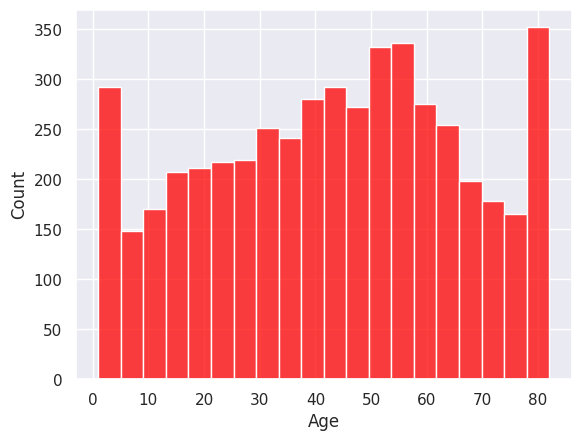

In [31]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'age', color = 'red')
plt.xlabel('Age');

In [32]:
df['age'].describe()

count    4890.000000
mean       43.032106
std        22.439482
min         1.000000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

- The ages of persons whose data were collected ranged from 1 to 82.
- The average age was 43.

## Gender

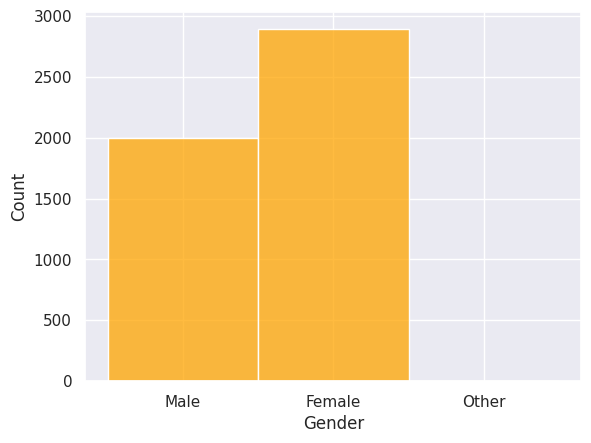



Female    2890
Male      1999
Other        1
Name: gender, dtype: int64


In [33]:
sns.histplot(data = df, x = 'gender', color = 'orange')
plt.xlabel('Gender');
plt.show()
print('\n')
print(df['gender'].value_counts())

- More data from females was collected than male.
- There was only one person who identified with another gender other than male or female.

##Hypertension

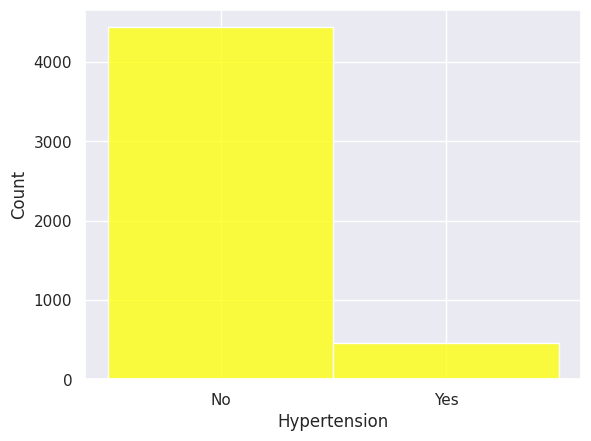



0    4439
1     451
Name: hypertension, dtype: int64


In [34]:
hist_df = df.copy()
hist_df['hypertension'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'hypertension', color = 'yellow')
plt.xlabel('Hypertension');
plt.show()
print('\n')
print(df['hypertension'].value_counts())

- The majority of persons did not have hypertension.

##Heart Disease

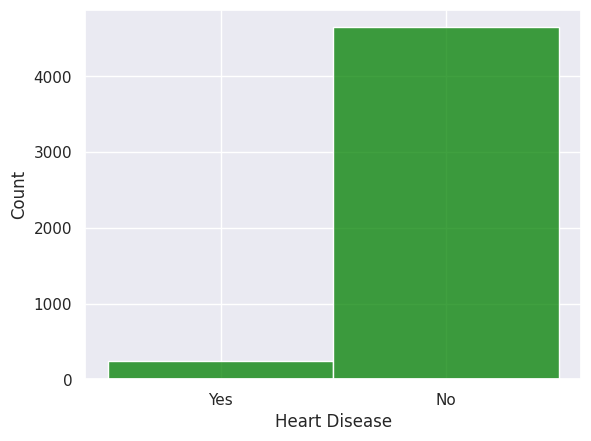



0    4647
1     243
Name: heart_disease, dtype: int64


In [35]:
hist_df['heart_disease'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'heart_disease', color = 'green')
plt.xlabel('Heart Disease');
plt.show()
print('\n')
print(df['heart_disease'].value_counts())

- The majority of persons did not have heart disease.

##Work Type

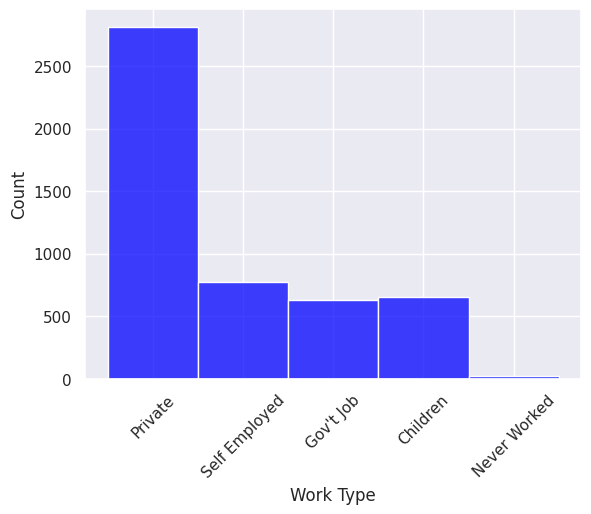



Private          2811
Self-employed     775
Children          652
Govt_Job          630
Never_Worked       22
Name: work_type, dtype: int64


In [36]:
ax3 = sns.histplot(data = df, x = 'work_type', color = 'blue')
ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticklabels(['Private', 'Self Employed', "Gov't Job", 'Children', 'Never Worked'], rotation = 45)
plt.xlabel('Work Type');
plt.show()
print('\n')
print(df['work_type'].value_counts())

- The majority of persons are employed by a private employer.
- 652 persons were identified as children.

##Residence Type

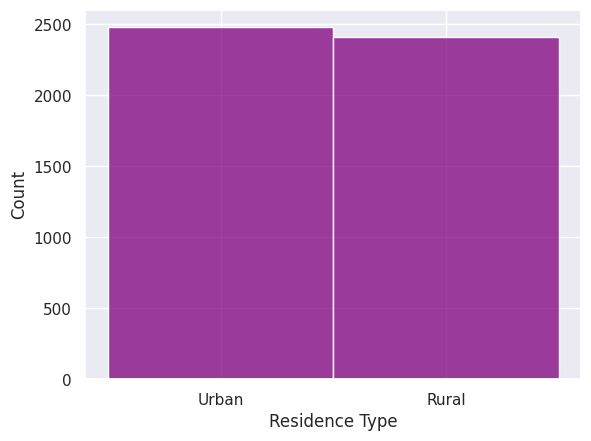



Urban    2480
Rural    2410
Name: residence_type, dtype: int64


In [37]:
sns.histplot(data = df, x = 'residence_type', color = 'purple')
plt.xlabel('Residence Type');
plt.show()
print('\n')
print(df['residence_type'].value_counts())

- The data collected comes from an almost equal spit between rural and urban residences.

##Average Glucose Level

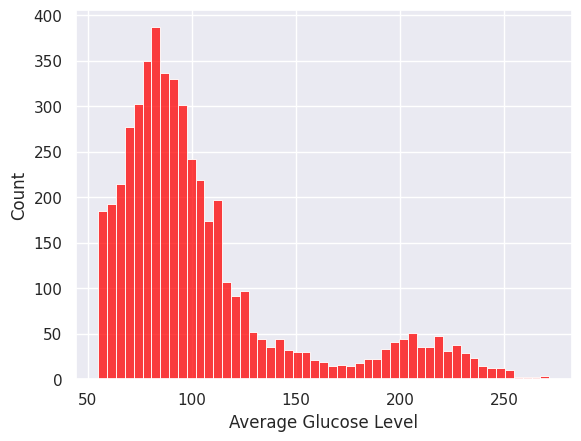

In [38]:
sns.histplot(data = df, x = 'avg_glucose_level', color = 'red')
plt.xlabel('Average Glucose Level');

- The majority of persons had average glucose levels under 120.

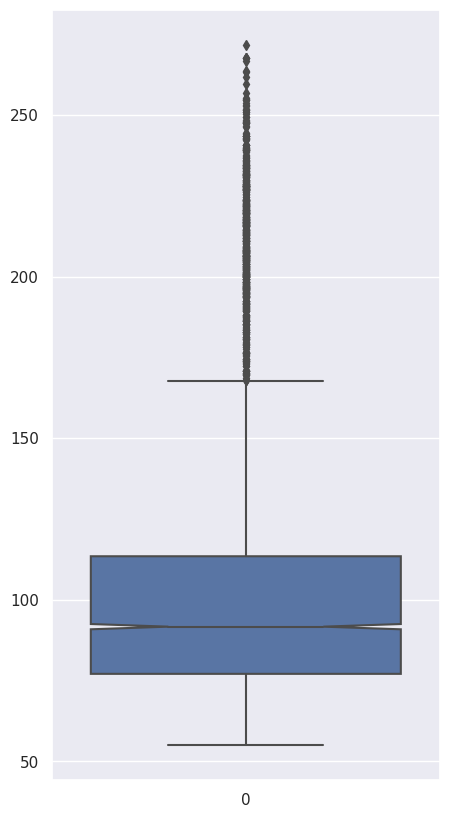



count    4890.000000
mean      105.338519
std        44.475138
min        55.120000
25%        77.080000
50%        91.680000
75%       113.465000
max       271.740000
Name: avg_glucose_level, dtype: float64


In [39]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = df['avg_glucose_level'], notch = True);
plt.show()
print('\n')
print(df['avg_glucose_level'].describe())

In [40]:
113.465 + 1.5*(113.465 - 77.08)

168.04250000000002

In [41]:
# Amount of Average Glucose Level outliers was calculated by finding the maximum and identifying any data points beyond.
# Maximum was calculated by equation Q3 + 1.5*IQR, or 75th percentile plus the product of 1.5 and the difference of the 75th to the 25th percentile.
gluc_outlier = df[df['avg_glucose_level'] > 168.0425]
gluc_outlier.sort_values(by = 'avg_glucose_level', ascending= True)

,gender,age,hypertension,heart_disease,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
2517,Male,55,1,0,Private,Urban,168.06,23.5,Smokes,0
1575,Female,18,0,0,Private,Rural,168.15,48.5,Never_Smoked,0
1797,Female,26,0,0,Private,Urban,168.15,22.9,Never_Smoked,0
4266,Male,81,0,0,Private,Urban,168.68,23.4,Formerly_Smoked,0
2637,Male,78,0,1,Self-employed,Urban,169.43,23.5,Formerly_Smoked,0
...,...,...,...,...,...,...,...,...,...,...
2462,Female,60,0,0,Govt_Job,Rural,266.59,25.5,Never_Smoked,0
4983,Male,76,1,0,Private,Rural,267.60,30.5,Never_Smoked,0
3088,Female,76,0,0,Self-employed,Urban,267.61,27.9,Smokes,0
1207,Female,49,0,0,Private,Urban,267.76,29.3,Formerly_Smoked,0


In [42]:
print(f'Outliers: {gluc_outlier.value_counts().sum()}')
print(f'{((gluc_outlier.value_counts().sum())/4890).round(4)*100}%')

Outliers: 570
11.66%


- There were 570 outliers in Average Glucose Levels, which accouts for approximately 11.66% of collected data.
- The outlier values ranged from 168.06 to 271.74

##BMI

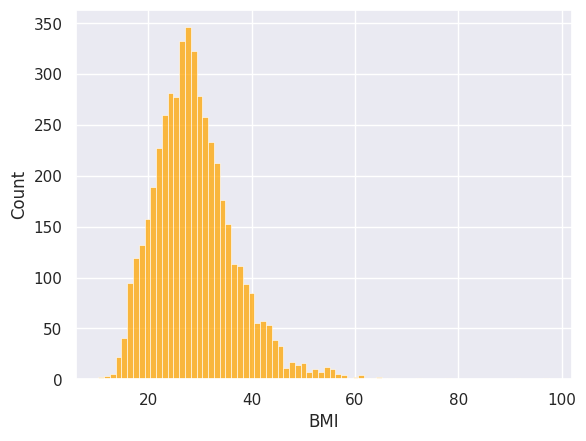

In [43]:
sns.histplot(data = df, x = 'bmi', color = 'orange')
plt.xlabel('BMI');

- Majority of BMI levels were 35 and under.

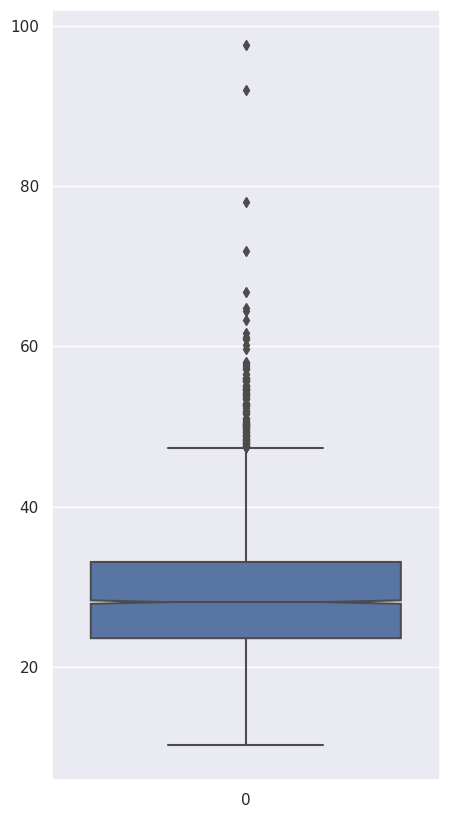



count    4890.000000
mean       28.940757
std         7.831014
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [44]:
plt.figure(figsize=(5, 10))
sns.boxplot(data = df['bmi'], notch = True);
plt.show()
print('\n')
print(df['bmi'].describe())

In [45]:
33.1 + 1.5*(33.1 - 23.6)

47.35

In [46]:
# Amount of BMI outliers was calculated by finding the maximum and identifying any data points beyond.
# Maximum was calculated by equation Q3 + 1.5*IQR, or 75th percentile plus the product of 1.5 and the difference of the 75th to the 25th percentile.
bmi_outlier = df[df['bmi'] > 47.35]
bmi_outlier.sort_values(by = 'bmi', ascending= True)

,gender,age,hypertension,heart_disease,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3594,Female,62,0,0,Private,Rural,226.38,47.4,Never_Smoked,0
66,Female,70,0,0,Private,Urban,221.58,47.5,Never_Smoked,1
1529,Female,82,0,0,Private,Urban,253.16,47.5,Unknown,0
4533,Female,32,0,0,Private,Rural,66.30,47.5,Never_Smoked,0
4405,Female,70,0,0,Private,Rural,149.80,47.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...
1559,Female,53,0,0,Private,Rural,72.63,66.8,Unknown,0
544,Male,42,0,0,Private,Rural,210.48,71.9,Never_Smoked,0
928,Female,23,1,0,Private,Urban,70.03,78.0,Smokes,0
4209,Male,38,1,0,Private,Rural,56.90,92.0,Never_Smoked,0


In [47]:
print(f'Outliers: {bmi_outlier.value_counts().sum()}')
print(f'{((bmi_outlier.value_counts().sum())/4890).round(4)*100}%')

Outliers: 114
2.33%


- There were 114 outliers in BMI, which accouts for approximately 2.33% of collected data.
- The outlier values ranged from 47.4 to 97.6

##Smoking Status

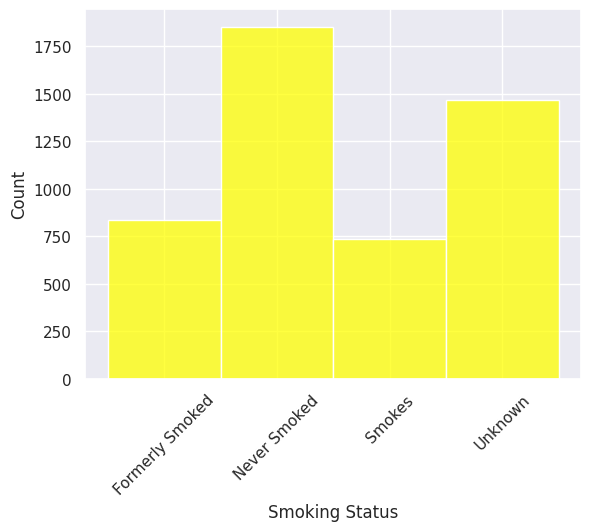



Never_Smoked       1852
Unknown            1464
Formerly_Smoked     837
Smokes              737
Name: smoking_status, dtype: int64


In [48]:
ax4 = sns.histplot(data = df, x = 'smoking_status', color = 'yellow')
ax4.set_xticks([0, 1, 2, 3])
ax4.set_xticklabels(['Formerly Smoked', 'Never Smoked', 'Smokes', 'Unknown'], rotation = 45)
plt.xlabel('Smoking Status');
plt.show()
print('\n')
print(df['smoking_status'].value_counts())

In [49]:
(1464/4890)

0.29938650306748466

- Majority of known smoking status falls under Never Smoked
- There is a large amount of Unknown values (~ 29.9%).
>Since cigarette smoking is a well established risk factor for all forms of stroke ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2928253/#:~:text=Cigarette%20smoking%20is%20a%20well,for%20all%20forms%20of%20stroke)) I have not dropped this column. Imputing incorrect values on such a large amount of data will skew results, therefore I will work with data as-is.

##Stroke

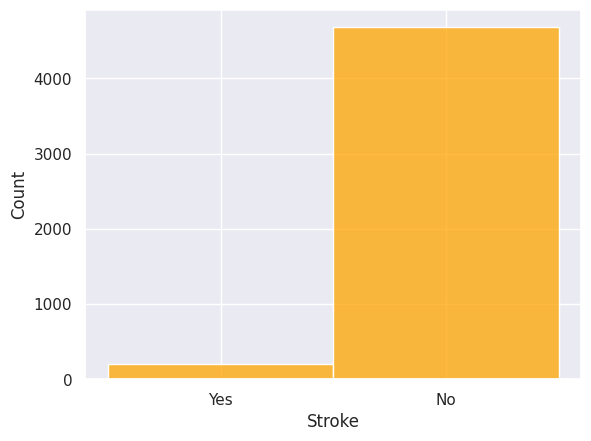



0    4681
1     209
Name: stroke, dtype: int64


In [50]:
hist_df['stroke'].replace({0:'No', 1:'Yes'}, inplace = True)
sns.histplot(data = hist_df, x = 'stroke', color = 'orange')
plt.xlabel('Stroke');
plt.show()
print('\n')
print(df['stroke'].value_counts())

- The majority of persons have not suffered a stroke.

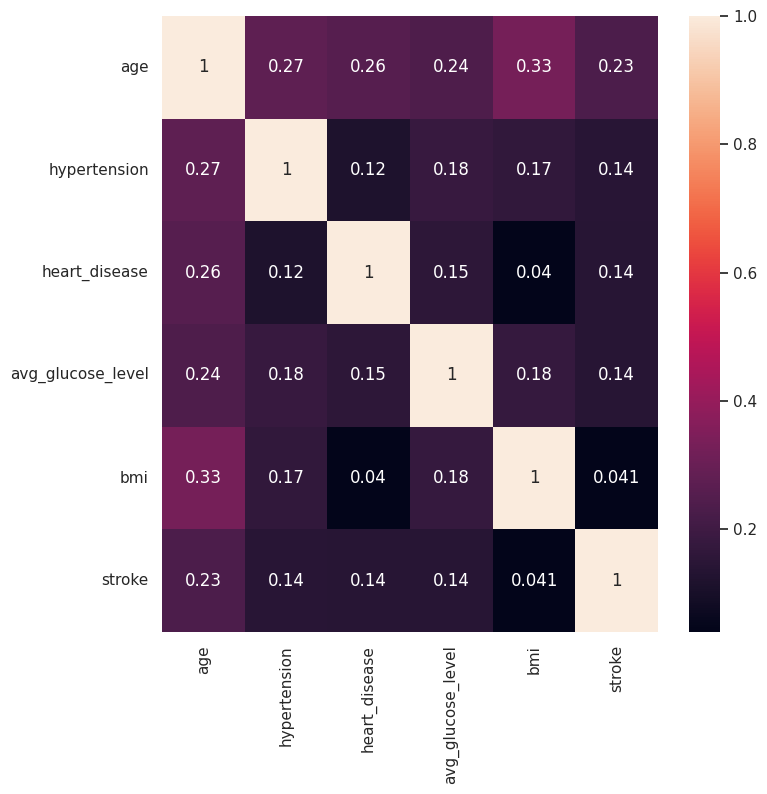

In [51]:
corr = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True);

- There is a low correlation between BMI and age
- All other correlations are negligible

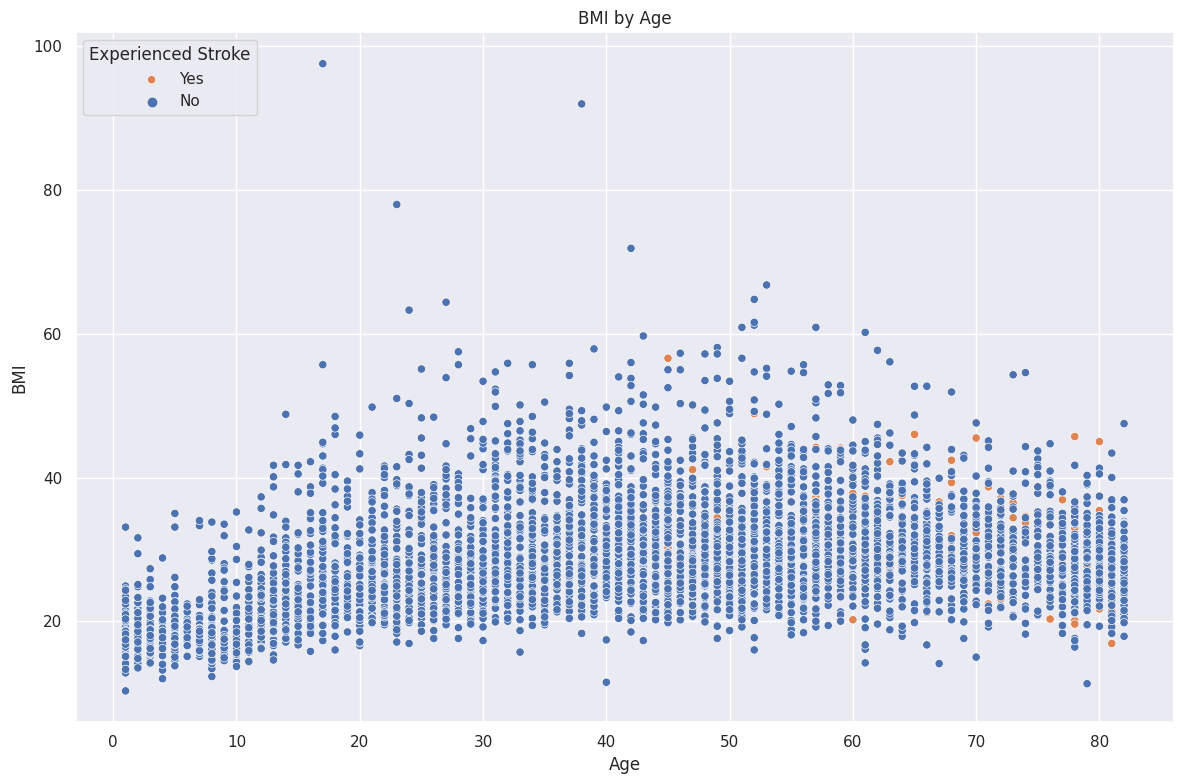

In [52]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'stroke')
plt.legend(title='Experienced Stroke', loc='upper left', labels=['Yes', 'No'])
plt.title('BMI by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.tight_layout();

- Here we see BMI by age.
- According to the Centers for Disease Control and Prevention (CDC), a healthy BMI ranges from 18.5 to 24.9 ([source](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20overweight%20range))
- BMI seems to rise slightly starting at age 30, then begins to fall slightly around age 65.

In [53]:
y_stroke = df.loc[df['stroke'] == 1]
n_stroke = df.loc[df['stroke'] == 0]

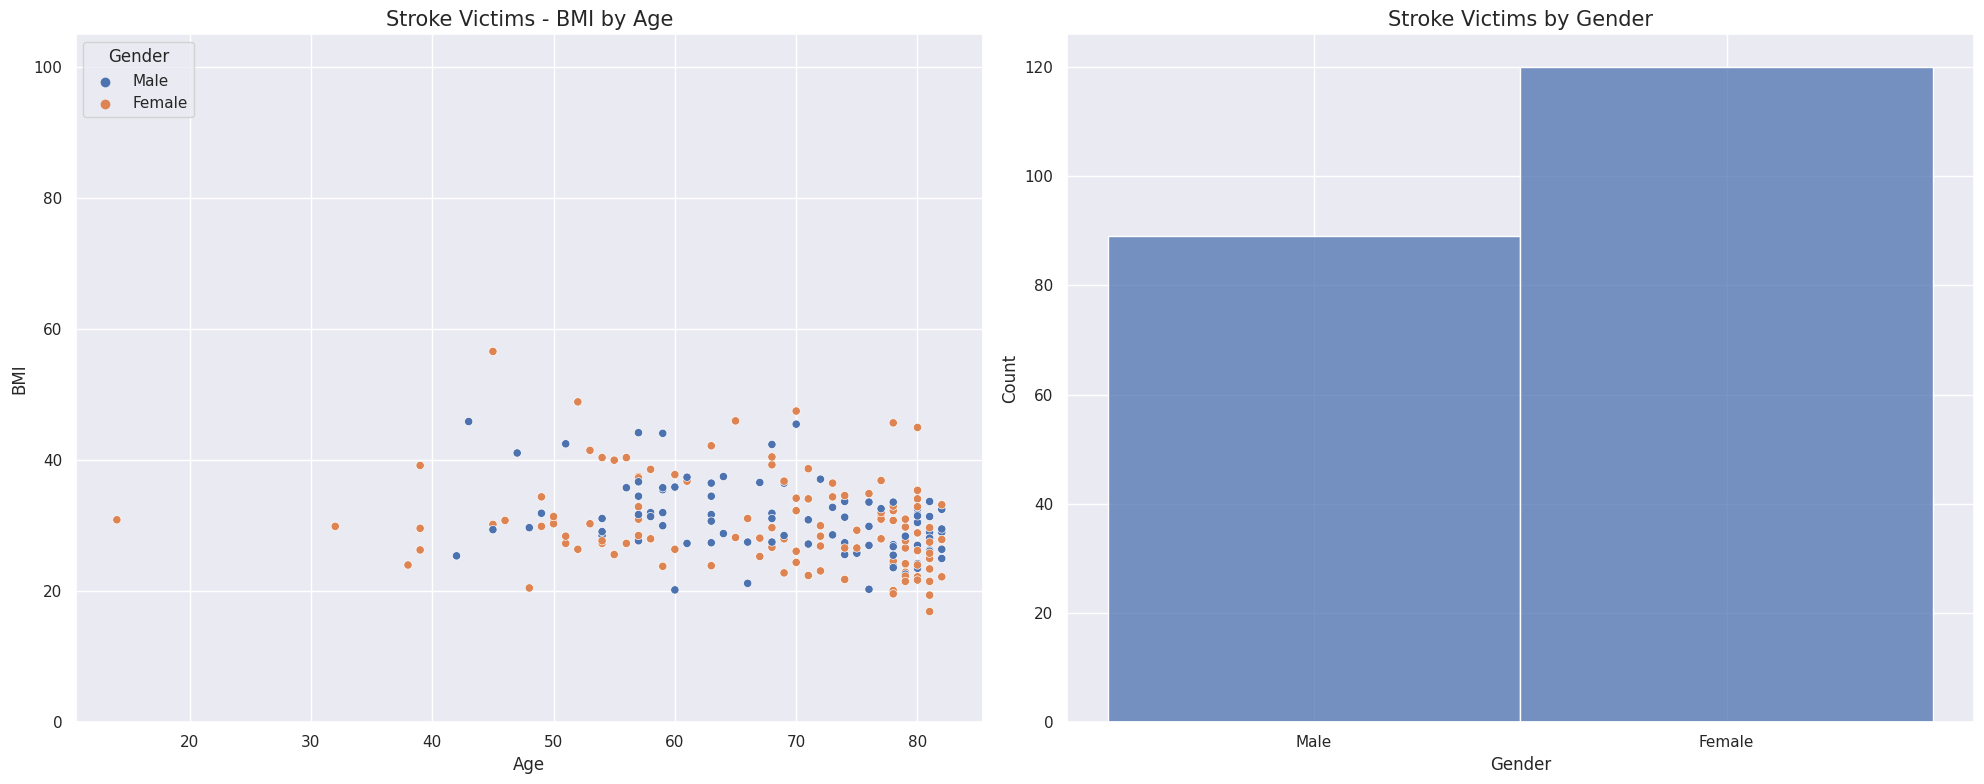

In [54]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
a = sns.histplot(data = y_stroke,
                 x = 'gender',
                 ax=axs[1]
                 )
a.set_title('Stroke Victims by Gender', fontsize = 15)
a.set_xlabel('Gender')



b = sns.scatterplot(data = y_stroke,
                    x = 'age', y = 'bmi',
                    hue= 'gender', ax=axs[0]
                    )
b.legend(title='Gender', loc='upper left')
b.set(ylim = (0, 105))
b.set_title('Stroke Victims - BMI by Age', fontsize = 15)
b.set_xlabel('Age')
b.set_ylabel('BMI')
plt.tight_layout();

- When we isolate the stroke victims and group by gender, we can see that stroke occurences are more frequent as age increases.
- Most stroke victims have a BMI of 25 or higher.
- We see stroke occurences start earlier in females. This could be due to the higher amount of data we have received from females.
- The highest density of stroke occurences are from ages 75 - 85.

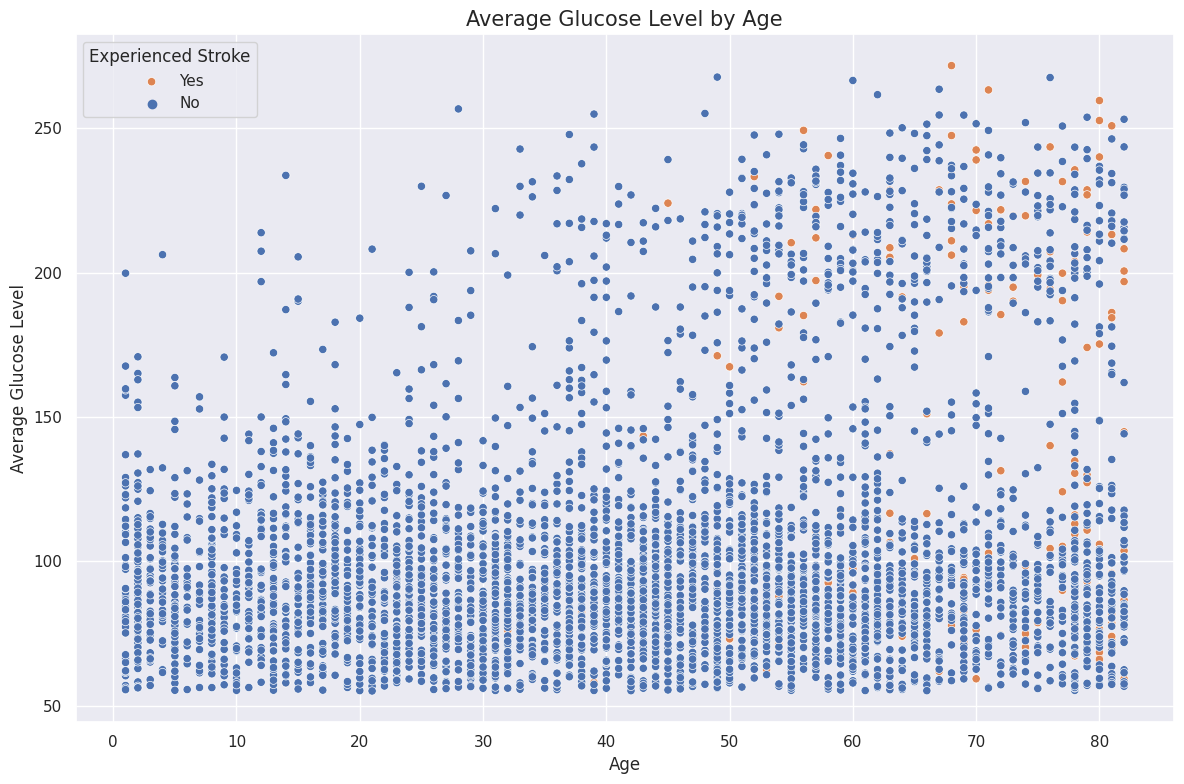

In [55]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue = 'stroke')
plt.legend(title='Experienced Stroke', loc='upper left', labels=['Yes', 'No'])
plt.title('Average Glucose Level by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.tight_layout();

- Looking at average glucose level, there is a set of outliers in the ranges of 40-85 (Age) and 175-300 (avg glucose level).
- From first glance, it seems most of our stroke victims are in the outlier group.

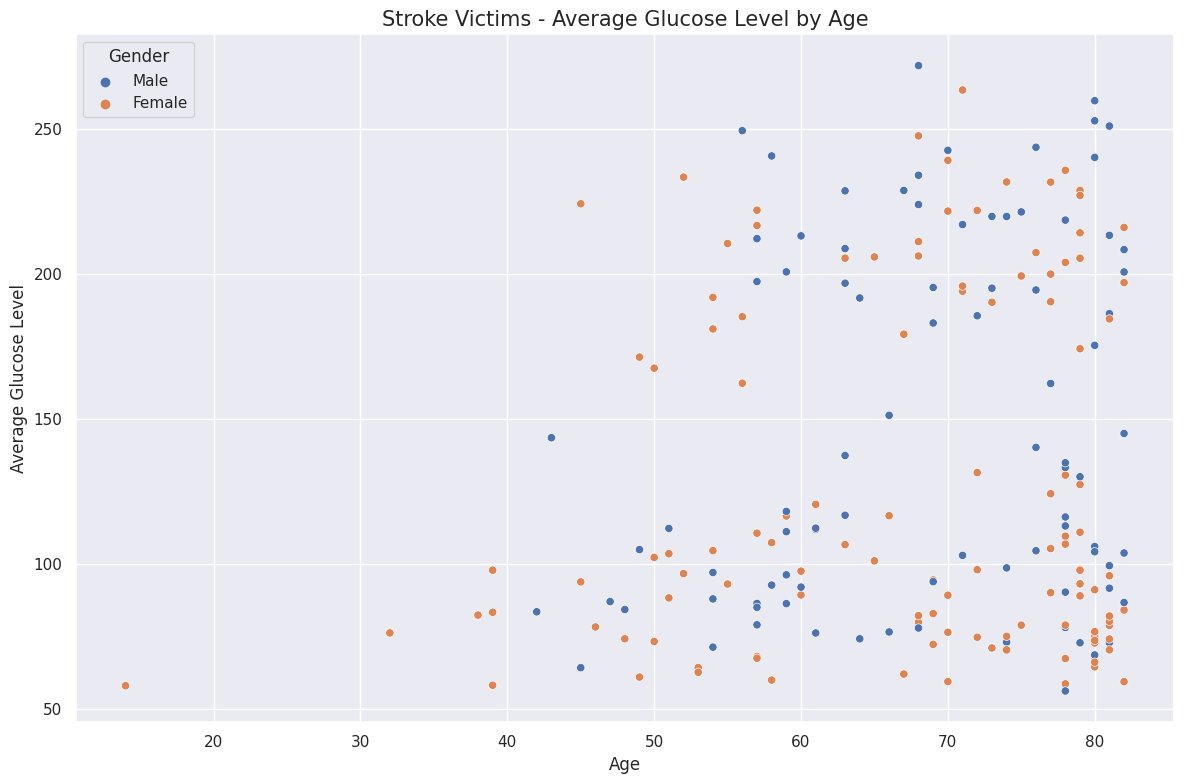

In [56]:
plt.figure(figsize = (12, 8))
c= sns.scatterplot(data = y_stroke,
                  x = 'age', y = 'avg_glucose_level',
                  hue = 'gender'
                  )
plt.legend(title='Gender', loc='upper left')
c.set_title('Stroke Victims - Average Glucose Level by Age', fontsize = 15)
c.set_xlabel('Age')
c.set_ylabel('Average Glucose Level')
plt.tight_layout();

- When we isolate our stroke victims and group by gender, we can see that they are evenly dispersed between the lower and upper glucose levels.
- Once again, we a pattern of rising occurences as age increases.